In [1]:
import numpy as np
import pandas as pd
import sympy
from sympy import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings("ignore")

def fancy_print(eqn, x, label, split=False):
    if split:
        display("Supp. Eq. " + eqn + ", " + label + ":")
        display(x)
    else:
        display("Supp. Eq. " + eqn)
        display(Eq(symbols(label), x, evaluate=False))

# symbolic calculator

In [2]:
from sympy import *
class vec2A:
    def __init__(self,k,K,s,S):
        L = k.shape[0]
        Lv = L**2
        A = zeros(2*Lv, 2*Lv)
        def delta(i,j):
            return int(i==j)
        for i in range(2):
            for j in range(2):
                for m in range(L):
                    for l in range(L):
                        for n in range(L):
                            for o in range(L):
                                if i==0 and j==0:
                                    A[i*Lv + m*L + l, j*Lv + n*L + o] = (
                                        delta(m,n)*delta(l,o) - k[n,o]*delta(n,l)
                                    )
                                elif i==0 and j==1:
                                    A[i*Lv + m*L + l, j*Lv + n*L + o] = (
                                        -(S[n,o]*delta(m,o) + (1-delta(m,o))*s[n,o])*delta(n,l)
                                    )
                                elif i==1 and j==0:
                                    A[i*Lv + m*L + l, j*Lv + n*L + o] = (
                                        -(K[n,o]*delta(m,o) + (1-delta(m,o))*k[n,o])*delta(n,l)
                                    )
                                elif i==1 and j==1:
                                    A[i*Lv + m*L + l, j*Lv + n*L + o] = (
                                        delta(m,n)*delta(l,o) - s[n,o]*delta(n,l)
                                    )
        self.A = A
    def theta(self):
        return -self.A.det()
    def eigenvals(self):
        return list((-self.A).eigenvals().keys())

# S.VI. Graphs and hypergraphs

In [3]:
class HypergraphPercolation:
    def __init__(self, graph=False):
        L = 2
        k = zeros(L, L)
        K = zeros(L, L)
        s = zeros(L, L)
        S = zeros(L, L)
        p = symbols('p')
        q = symbols('q')
        k[0,1] = p*symbols('k')
        K[0,1] = p*symbols('K')
        s[1,0] = 1+q if graph else q*symbols('c')
        S[1,0] = q if graph else q*symbols('C')
        self.A = vec2A(k,K,s,S)

In [4]:
# hypergraph

H = HypergraphPercolation()
fancy_print("1", H.A.theta(), 'theta')
fancy_print("2", H.A.eigenvals(), "eigenvalues", split=True)
fancy_print("3", H.A.eigenvals()[1], "Lambda")

'Supp. Eq. 1'

Eq(theta, C*K*p*q - 1)

'Supp. Eq. 2, eigenvalues:'

[-sqrt(C*K*p*q) - 1, sqrt(C*K*p*q) - 1, -1]

'Supp. Eq. 3'

Eq(Lambda, sqrt(C*K*p*q) - 1)

In [5]:
# graph
G = HypergraphPercolation(graph=True)
fancy_print("4", G.A.theta(), 'theta')
fancy_print("5", G.A.eigenvals(), "eigenvalues", split=True)
fancy_print("6", G.A.eigenvals()[1], "Lambda")

'Supp. Eq. 4'

Eq(theta, K*p*q - 1)

'Supp. Eq. 5, eigenvalues:'

[-sqrt(K*p*q) - 1, sqrt(K*p*q) - 1, -1]

'Supp. Eq. 6'

Eq(Lambda, sqrt(K*p*q) - 1)

# S.V. Multiplex

In [6]:
class MultiplexHypergraph:
    def __init__(self, number_of_types=2, graph=False, poisson=False):
        L = number_of_types + 1
        Lv = L**2
        k = zeros(L, L)
        K = zeros(L, L)
        s = zeros(L, L)
        S = zeros(L, L)
        for l in range(1,L):
            k[0,l] = symbols('k_0'+str(l))
            K[0,l] = symbols('K_0'+str(l))
            s[l,0] = 2 if graph else symbols('s_'+str(l)+'0')
            S[l,0] = 1 if graph else symbols('S_'+str(l)+'0')
        if poisson:
            K = k
        if not graph and poisson:
            S = s
        self.A = vec2A(k,K,s,S)

In [7]:
# multiplex hypergraph: 2 types

MH = MultiplexHypergraph(number_of_types=2)
fancy_print("7", MH.A.theta(), 'theta')
fancy_print("8", MH.A.eigenvals(), "eigenvalues", split=True)
fancy_print("9", MH.A.eigenvals()[3], "Lambda")

'Supp. Eq. 7'

Eq(theta, -K_01*K_02*S_10*S_20 + K_01*S_10 + K_02*S_20 + S_10*S_20*k_01*k_02 - 1)

'Supp. Eq. 8, eigenvalues:'

[-sqrt(2)*sqrt(K_01*S_10 + K_02*S_20 - sqrt(K_01**2*S_10**2 - 2*K_01*K_02*S_10*S_20 + K_02**2*S_20**2 + 4*S_10*S_20*k_01*k_02))/2 - 1,
 sqrt(2)*sqrt(K_01*S_10 + K_02*S_20 - sqrt(K_01**2*S_10**2 - 2*K_01*K_02*S_10*S_20 + K_02**2*S_20**2 + 4*S_10*S_20*k_01*k_02))/2 - 1,
 -sqrt(2)*sqrt(K_01*S_10 + K_02*S_20 + sqrt(K_01**2*S_10**2 - 2*K_01*K_02*S_10*S_20 + K_02**2*S_20**2 + 4*S_10*S_20*k_01*k_02))/2 - 1,
 sqrt(2)*sqrt(K_01*S_10 + K_02*S_20 + sqrt(K_01**2*S_10**2 - 2*K_01*K_02*S_10*S_20 + K_02**2*S_20**2 + 4*S_10*S_20*k_01*k_02))/2 - 1,
 -1]

'Supp. Eq. 9'

Eq(Lambda, sqrt(2)*sqrt(K_01*S_10 + K_02*S_20 + sqrt(K_01**2*S_10**2 - 2*K_01*K_02*S_10*S_20 + K_02**2*S_20**2 + 4*S_10*S_20*k_01*k_02))/2 - 1)

In [8]:
# multiplex hypergraph: 3 types

MH3 = MultiplexHypergraph(number_of_types=3)
fancy_print("10", MH3.A.theta(), 'theta')

'Supp. Eq. 10'

Eq(theta, K_01*K_02*K_03*S_10*S_20*S_30 - K_01*K_02*S_10*S_20 - K_01*K_03*S_10*S_30 - K_01*S_10*S_20*S_30*k_02*k_03 + K_01*S_10 - K_02*K_03*S_20*S_30 - K_02*S_10*S_20*S_30*k_01*k_03 + K_02*S_20 - K_03*S_10*S_20*S_30*k_01*k_02 + K_03*S_30 + 2*S_10*S_20*S_30*k_01*k_02*k_03 + S_10*S_20*k_01*k_02 + S_10*S_30*k_01*k_03 + S_20*S_30*k_02*k_03 - 1)

# S.V.A. Poisson multiplex hypergraph

In [9]:
# multiplex hypergraph: Poisson

MHP5 = MultiplexHypergraph(number_of_types=4, poisson=True)
eigenvals = MHP5.A.eigenvals()
fancy_print("11", MHP5.A.theta(), 'theta')
fancy_print("12", eigenvals, "eigenvalues", split=True)
fancy_print("13", eigenvals[2], "Lambda")

'Supp. Eq. 11'

Eq(theta, k_01*s_10 + k_02*s_20 + k_03*s_30 + k_04*s_40 - 1)

'Supp. Eq. 12, eigenvalues:'

[-1,
 -sqrt(k_01*s_10 + k_02*s_20 + k_03*s_30 + k_04*s_40) - 1,
 sqrt(k_01*s_10 + k_02*s_20 + k_03*s_30 + k_04*s_40) - 1]

'Supp. Eq. 13'

Eq(Lambda, sqrt(k_01*s_10 + k_02*s_20 + k_03*s_30 + k_04*s_40) - 1)

# S.V.B. network motifs

In [10]:
# multiplex graph: links (l=1), triangles (l=2)
L = 3
Lv = L**2
k = zeros(L, L)
K = zeros(L, L)
s = zeros(L, L)
S = zeros(L, L)
q = symbols('q')
k[0,1] = symbols('k_L')
k[0,2] = symbols('k_T')
K[0,1] = symbols('K_L')
K[0,2] = symbols('K_T')
s[1,0] = 1+q
s[2,0] = 3*(q**3+3*q**2*(1-q)) + (3/2)*3*q*(1-q)**2 + (1-q)**3
S[1,0] = q
#
# S[2,0] = 2[p^3 + 3p^2(1-p)] + 2p(1-p)^2
#
S[2,0] = 2*q*(1+q-q**2)
NM = vec2A(k,K,s,S)
theta = NM.theta
eigenvals = NM.eigenvals
expected = K[0,1]*S[1,0] + K[0,2]*S[2,0] - 1 + S[1,0]*S[2,0]*( k[0,1]*k[0,2] - K[0,1]*K[0,2] )
fancy_print("14", NM.theta(), 'theta')
fancy_print("15", NM.eigenvals(), "eigenvalues", split=True)
fancy_print("16", NM.eigenvals()[3], "Lambda")

'Supp. Eq. 14'

Eq(theta, 2*K_L*K_T*q**4 - 2*K_L*K_T*q**3 - 2*K_L*K_T*q**2 + K_L*q - 2*K_T*q**3 + 2*K_T*q**2 + 2*K_T*q - 2*k_L*k_T*q**4 + 2*k_L*k_T*q**3 + 2*k_L*k_T*q**2 - 1)

'Supp. Eq. 15, eigenvalues:'

[-sqrt(2)*sqrt(K_L*q - 2*K_T*q**3 + 2*K_T*q**2 + 2*K_T*q - q*sqrt(K_L**2 + 4*K_L*K_T*q**2 - 4*K_L*K_T*q - 4*K_L*K_T + 4*K_T**2*q**4 - 8*K_T**2*q**3 - 4*K_T**2*q**2 + 8*K_T**2*q + 4*K_T**2 - 8*k_L*k_T*q**2 + 8*k_L*k_T*q + 8*k_L*k_T))/2 - 1,
 sqrt(2)*sqrt(K_L*q - 2*K_T*q**3 + 2*K_T*q**2 + 2*K_T*q - q*sqrt(K_L**2 + 4*K_L*K_T*q**2 - 4*K_L*K_T*q - 4*K_L*K_T + 4*K_T**2*q**4 - 8*K_T**2*q**3 - 4*K_T**2*q**2 + 8*K_T**2*q + 4*K_T**2 - 8*k_L*k_T*q**2 + 8*k_L*k_T*q + 8*k_L*k_T))/2 - 1,
 -sqrt(2)*sqrt(K_L*q - 2*K_T*q**3 + 2*K_T*q**2 + 2*K_T*q + q*sqrt(K_L**2 + 4*K_L*K_T*q**2 - 4*K_L*K_T*q - 4*K_L*K_T + 4*K_T**2*q**4 - 8*K_T**2*q**3 - 4*K_T**2*q**2 + 8*K_T**2*q + 4*K_T**2 - 8*k_L*k_T*q**2 + 8*k_L*k_T*q + 8*k_L*k_T))/2 - 1,
 sqrt(2)*sqrt(K_L*q - 2*K_T*q**3 + 2*K_T*q**2 + 2*K_T*q + q*sqrt(K_L**2 + 4*K_L*K_T*q**2 - 4*K_L*K_T*q - 4*K_L*K_T + 4*K_T**2*q**4 - 8*K_T**2*q**3 - 4*K_T**2*q**2 + 8*K_T**2*q + 4*K_T**2 - 8*k_L*k_T*q**2 + 8*k_L*k_T*q + 8*k_L*k_T))/2 - 1,
 -1]

'Supp. Eq. 16'

Eq(Lambda, sqrt(2)*sqrt(K_L*q - 2*K_T*q**3 + 2*K_T*q**2 + 2*K_T*q + q*sqrt(K_L**2 + 4*K_L*K_T*q**2 - 4*K_L*K_T*q - 4*K_L*K_T + 4*K_T**2*q**4 - 8*K_T**2*q**3 - 4*K_T**2*q**2 + 8*K_T**2*q + 4*K_T**2 - 8*k_L*k_T*q**2 + 8*k_L*k_T*q + 8*k_L*k_T))/2 - 1)

In [11]:
# poisson multiplex graph: links (l=1), triangles (l=2)

L = 3
Lv = L**2
k = zeros(L, L)
s = zeros(L, L)
S = zeros(L, L)
q = symbols('q')
k[0,1] = symbols('k_L')
k[0,2] = symbols('k_T')
K = k
s[1,0] = 1+q
s[2,0] = 3*(q**3+3*q**2*(1-q)) + (3/2)*3*q*(1-q)**2 + (1-q)**3
S[1,0] = q
#
# S[2,0] = 2[p^3 + 3p^2(1-p)] + 2p(1-p)^2
#
S[2,0] = 2*q*(1+q-q**2)
NMP = vec2A(k,K,s,S)
theta = NM.theta()
eigenvals = NM.eigenvals()
expected = K[0,1]*S[1,0] + K[0,2]*S[2,0] - 1 + S[1,0]*S[2,0]*( k[0,1]*k[0,2] - K[0,1]*K[0,2] )
fancy_print("17", NMP.theta(), 'theta')
fancy_print("18", NMP.eigenvals(), "eigenvalues", split=True)
fancy_print("19", NMP.eigenvals()[2], "Lambda")

'Supp. Eq. 17'

Eq(theta, k_L*q - 2*k_T*q**3 + 2*k_T*q**2 + 2*k_T*q - 1)

'Supp. Eq. 18, eigenvalues:'

[-1,
 -sqrt(k_L*q - 2*k_T*q**3 + 2*k_T*q**2 + 2*k_T*q) - 1,
 sqrt(k_L*q - 2*k_T*q**3 + 2*k_T*q**2 + 2*k_T*q) - 1]

'Supp. Eq. 19'

Eq(Lambda, sqrt(k_L*q - 2*k_T*q**3 + 2*k_T*q**2 + 2*k_T*q) - 1)

'numerical evaluation'

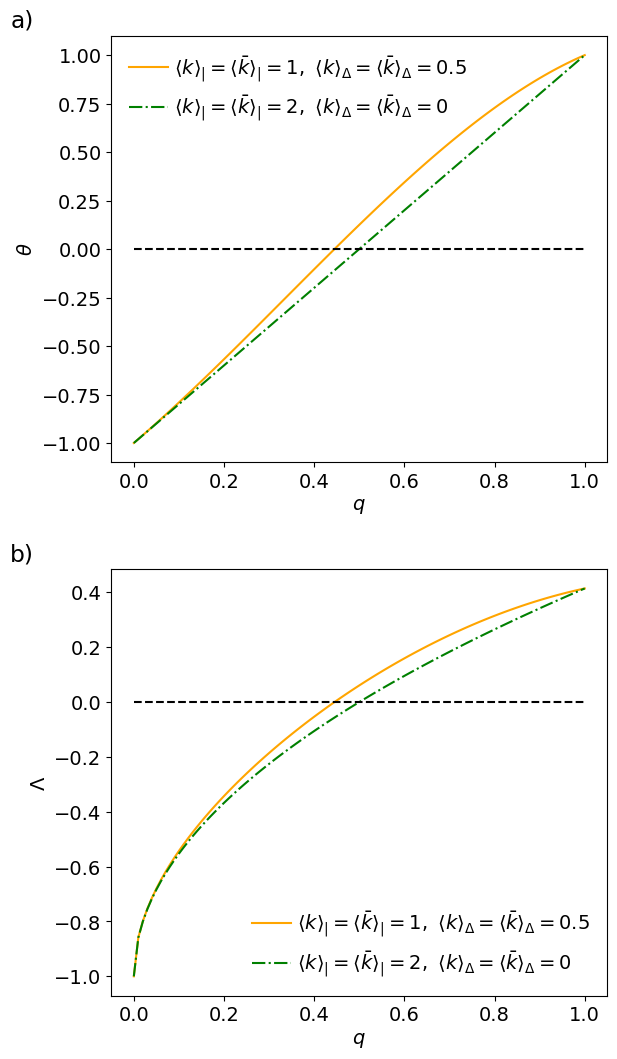

In [12]:
#
#   Fig. 4. Numerical evaluation
#

display("numerical evaluation")

def ftheta(kL, kT, q):
    return theta.subs([(symbols('k_L'),kL), (symbols('k_T'),kT), (symbols('K_L'),kL), (symbols('K_T'),kT), (symbols('q'),q)])

def fLambda(kL, kT, q):
    return eigenvals[3].subs([(symbols('k_L'),kL), (symbols('k_T'),kT), (symbols('K_L'),kL), (symbols('K_T'),kT), (symbols('q'),q)])

fig,ax = plt.subplots(2,1)
np = 100
x = [i/np for i in range(0,np+1,1)]
kL = 1
kT = 0.5

y1 = [ftheta(kL, kT, xi) for xi in x]
y2 = [ftheta(kL+2*kT, 0, xi) for xi in x]
ax[0].plot(x, y1, c="orange", ls="-", label=r" $\langle k\rangle_|=\langle \bar{k}\rangle_|=1,\ \langle k\rangle_\Delta=\langle \bar{k}\rangle_\Delta=0.5$")
ax[0].plot(x, y2, c="green", ls="-.", label=r" $\langle k\rangle_|=\langle \bar{k}\rangle_|=2,\ \langle k\rangle_\Delta=\langle \bar{k}\rangle_\Delta=0$")
ax[0].plot([min(x),max(x)],[0,0], "k--")
ax[0].set(xlabel=r"$q$", ylabel=r"$\theta$")
ax[0].legend(loc = 'upper left', frameon = 0, handletextpad = 0, fontsize = 14)
ax[0].set_title("a)", x=-0.18, y=1)

z1 = [fLambda(1, kT, xi) for xi in x]
z2 = [fLambda(1+2*kT, 0, xi) for xi in x]
ax[1].plot(x, z1, c="orange", ls="-", label=r" $\langle k\rangle_|=\langle \bar{k}\rangle_|=1,\ \langle k\rangle_\Delta=\langle \bar{k}\rangle_\Delta=0.5$")
ax[1].plot(x, z2, c="green", ls="-.", label=r" $\langle k\rangle_|=\langle \bar{k}\rangle_|=2,\ \langle k\rangle_\Delta=\langle \bar{k}\rangle_\Delta=0$")
ax[1].plot([min(x),max(x)],[0,0], "k--")
ax[1].set(xlabel=r"$q$", ylabel=r"$\Lambda$")
ax[1].legend(loc = 'lower right', frameon = 0, handletextpad = 0, fontsize = 14)
ax[1].set_title("b)", x=-0.18, y=1)

plt.subplots_adjust(bottom=0, top=2, hspace=0.25)
plt.savefig('fig_theta_triangle.pdf',bbox_inches='tight', facecolor='white', edgecolor='none', dpi=300)

# S.VI. interacting graphs and hypergraphs

In [13]:
class InteractingHypergraphs:
    """
    A class for the order parameter of interacting graphs/hypergraphs
    g: number of graphs/hypegraphs
    graph: True for graphs and False for hypergraphs
    poisson: True for Poisson degree and cardinality distributions else False
    """
    def __init__(self, g=2, graph=False, poisson=False):
        L = int(g+(g*(g+1))/2)
        k = zeros(L, L)
        K = zeros(L, L)
        s = zeros(L, L)
        S = zeros(L, L)
        #
        # i = l (l=0,..,g-1): nodes of graph G_l
        # i = g + sum_{m=0}^{l-1}(g-m) + m-l: links between nodes l in G_l and m in G_m
        #
        for l in range(g):
            for m in range(l,g):
                i = g + l*g - int((l*(l-1))/2) + m - l
                if l==m:
                    k[l,i] = symbols('k_'+str(l)+str(i))
                    K[l,i] = symbols('K_'+str(l)+str(i))
                    s[i,l] = 2 if graph else symbols('c_'+str(i)+str(l))
                    S[i,l] = 1 if graph else symbols('C_'+str(i)+str(l))
                else:
                    k[l,i] = symbols('k_'+str(l)+str(i))
                    k[m,i] = symbols('k_'+str(m)+str(i))
                    K[l,i] = symbols('K_'+str(l)+str(i))
                    K[m,i] = symbols('K_'+str(m)+str(i))                      
                    s[i,l] = 1 if graph else symbols('c_'+str(i)+str(l))
                    s[i,m] = 1 if graph else symbols('c_'+str(i)+str(m))
                    S[i,l] = 0 if graph else symbols('C_'+str(i)+str(l))
                    S[i,m] = 0 if graph else symbols('C_'+str(i)+str(m))
        if poisson:
            K = k
        if poisson and not graph:
            S = s
        self.A = vec2A(k,K,s,S)

In [14]:
# two interacting hypegraphs with Poisson degree and cardinality distributions

IHP2 = InteractingHypergraphs(g=2, poisson=True)
fancy_print("20", IHP2.A.theta(), 'theta')
fancy_print("21", IHP2.A.eigenvals(), "eigenvalues", split=True)
fancy_print("22", IHP2.A.eigenvals()[4], "Lambda")

'Supp. Eq. 20'

Eq(theta, -c_20*c_31*k_02*k_13 - c_20*c_41*k_02*k_14 + c_20*k_02 - c_30*c_41*k_03*k_14 + c_30*k_03 + c_31*k_13 + c_41*k_14 - 1)

'Supp. Eq. 21, eigenvalues:'

[-1,
 -sqrt(c_20*k_02/2 + c_30*k_03/2 + c_31*k_13/2 + c_41*k_14/2 - sqrt(c_20**2*k_02**2 + 2*c_20*c_30*k_02*k_03 - 2*c_20*c_31*k_02*k_13 - 2*c_20*c_41*k_02*k_14 + c_30**2*k_03**2 + 2*c_30*c_31*k_03*k_13 - 2*c_30*c_41*k_03*k_14 + c_31**2*k_13**2 + 2*c_31*c_41*k_13*k_14 + c_41**2*k_14**2)/2) - 1,
 -sqrt(c_20*k_02/2 + c_30*k_03/2 + c_31*k_13/2 + c_41*k_14/2 + sqrt(c_20**2*k_02**2 + 2*c_20*c_30*k_02*k_03 - 2*c_20*c_31*k_02*k_13 - 2*c_20*c_41*k_02*k_14 + c_30**2*k_03**2 + 2*c_30*c_31*k_03*k_13 - 2*c_30*c_41*k_03*k_14 + c_31**2*k_13**2 + 2*c_31*c_41*k_13*k_14 + c_41**2*k_14**2)/2) - 1,
 sqrt(c_20*k_02/2 + c_30*k_03/2 + c_31*k_13/2 + c_41*k_14/2 - sqrt(c_20**2*k_02**2 + 2*c_20*c_30*k_02*k_03 - 2*c_20*c_31*k_02*k_13 - 2*c_20*c_41*k_02*k_14 + c_30**2*k_03**2 + 2*c_30*c_31*k_03*k_13 - 2*c_30*c_41*k_03*k_14 + c_31**2*k_13**2 + 2*c_31*c_41*k_13*k_14 + c_41**2*k_14**2)/2) - 1,
 sqrt(c_20*k_02/2 + c_30*k_03/2 + c_31*k_13/2 + c_41*k_14/2 + sqrt(c_20**2*k_02**2 + 2*c_20*c_30*k_02*k_03 - 2*c_20*c_31*k_

'Supp. Eq. 22'

Eq(Lambda, sqrt(c_20*k_02/2 + c_30*k_03/2 + c_31*k_13/2 + c_41*k_14/2 + sqrt(c_20**2*k_02**2 + 2*c_20*c_30*k_02*k_03 - 2*c_20*c_31*k_02*k_13 - 2*c_20*c_41*k_02*k_14 + c_30**2*k_03**2 + 2*c_30*c_31*k_03*k_13 - 2*c_30*c_41*k_03*k_14 + c_31**2*k_13**2 + 2*c_31*c_41*k_13*k_14 + c_41**2*k_14**2)/2) - 1)

In [15]:
# two interacting graphs with Poisson degree distributions

IGP2 = InteractingHypergraphs(g=2, graph=True, poisson=True)
fancy_print("23", IGP2.A.theta(), 'theta')
fancy_print("24", IGP2.A.eigenvals(), "eigenvalues", split=True)
fancy_print("25", IGP2.A.eigenvals()[4], "Lambda")

'Supp. Eq. 23'

Eq(theta, -k_02*k_14 + k_02 + k_03*k_13 + k_14 - 1)

'Supp. Eq. 24, eigenvalues:'

[-1,
 -sqrt(k_02/2 + k_14/2 - sqrt(k_02**2 - 2*k_02*k_14 + 4*k_03*k_13 + k_14**2)/2) - 1,
 -sqrt(k_02/2 + k_14/2 + sqrt(k_02**2 - 2*k_02*k_14 + 4*k_03*k_13 + k_14**2)/2) - 1,
 sqrt(k_02/2 + k_14/2 - sqrt(k_02**2 - 2*k_02*k_14 + 4*k_03*k_13 + k_14**2)/2) - 1,
 sqrt(k_02/2 + k_14/2 + sqrt(k_02**2 - 2*k_02*k_14 + 4*k_03*k_13 + k_14**2)/2) - 1]

'Supp. Eq. 25'

Eq(Lambda, sqrt(k_02/2 + k_14/2 + sqrt(k_02**2 - 2*k_02*k_14 + 4*k_03*k_13 + k_14**2)/2) - 1)

In [16]:
# two interacting graphs

IG2 = InteractingHypergraphs(g=2, graph=True)
fancy_print("26", IG2.A.theta(), 'theta')
#
#   WARNING! The eigenalues calculation are commented because they
#   can consume a lot of time and memmory
#
#fancy_print("27", IG2.A.eigenvals(), "eigenvalues", split=True)
#fancy_print("28", IG2.A.eigenvals()[4], "Lambda")

'Supp. Eq. 26'

Eq(theta, K_02*K_03*K_13*K_14 - K_02*K_03*K_13 - K_02*K_03*k_13*k_14 - K_02*K_14 + K_02 - K_03*K_13*K_14 + K_03*K_13 + K_03*k_13*k_14 - K_13*K_14*k_02*k_03 + K_13*k_02*k_03 + K_14 + k_02*k_03*k_13*k_14 - 1)